# California ZIP Codes - Race and income

### Import Python tools and Jupyter configuration

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
import altair as alt
import altair_latimes as lat

/Users/mhustiles/.local/share/virtualenvs/notebooks-xu8v5Vvv/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
alt.data_transformers.disable_max_rows()
pd.options.display.max_colwidth = None

### Import race data

In [4]:
race_df = pd.read_csv(
    "data/ca-zip-codes-race.csv",
    dtype={"zip": "str"},
)

In [5]:
race_df.head()

,objectid,zip,po_name,pop2012,white,black,ameri_es,asian,hawn_pi,hispanic,other,mult_race,med_age,ave_hh_sz,marhh_chd,families,ave_fam_sz,hse_units,sqmi
0,4800,94002,Belmont,26832,19634,477,84,5762,221,3517,1170,1744,41.0,2.42,2925,7671,2.98,12304,5.9
1,4801,94010,Burlingame,41102,31610,482,93,10244,188,5133,1865,2166,42.6,2.43,4798,12179,3.06,20020,13.0
2,4900,93442,Morro Bay,10873,9395,47,104,281,10,1602,645,322,48.9,2.09,593,2749,2.70,6609,43.2
3,4901,93445,Oceano,7633,4683,60,114,155,7,3389,1477,283,34.7,2.86,541,1582,3.42,2871,2.0
4,4802,94015,Daly City,61575,14279,2138,168,35940,482,9775,4520,2939,39.0,3.10,4637,13991,3.54,20103,5.7


### Import income data

In [6]:
income_df = pd.read_csv(
    "data/ca_zips_income.csv",
    dtype={"zip": "str"},
)

In [7]:
income_df.head()

,zip,name,avg_house_income,avg_net_worth,population
0,90001,Los Angeles,46931,82915,59907
1,90002,Los Angeles,46332,96786,53573
2,90003,Los Angeles,43020,66091,71967
3,90004,Los Angeles,65893,232653,63987
4,90005,Los Angeles,53191,105569,41844


---

### Merge them

In [8]:
zips = pd.merge(income_df, race_df, on="zip")

In [9]:
zips = zips[
    (zips["med_age"] > 0) & (zips["population"] > 0) & (zips["avg_house_income"] > 0)
]

In [10]:
race_cols = [
    "white",
    "black",
    "ameri_es",
    "asian",
    "hawn_pi",
    "hispanic",
    "other",
    "mult_race",
]

In [11]:
for r in race_cols:
    zips[f"{r}_pct"] = round(zips[f"{r}"] / zips["population"] * 100, 2)

In [12]:
zips = zips.dropna().drop(
    [
        "po_name",
        "pop2012",
        "sqmi",
        "marhh_chd",
        "hse_units",
        "families",
        "white",
        "black",
        "ameri_es",
        "asian",
        "hawn_pi",
        "hispanic",
        "other",
        "mult_race",
        "objectid",
    ],
    axis=1,
)

In [13]:
zips.to_csv("data/ca-zip_demographics.csv", index=False)

---

### Geography

In [14]:
gdf = gpd.read_file("data/zips.json")

In [15]:
gdf.columns

Index(['zip', 'geometry'], dtype='object')

<AxesSubplot:>

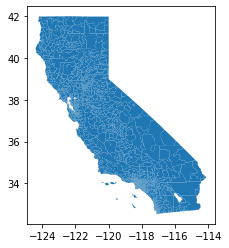

In [16]:
gdf.plot()

---

### Merge

In [17]:
merged_gdf = gdf.merge(zips, on="zip")

In [18]:
len(merged_gdf)

1616

<AxesSubplot:>

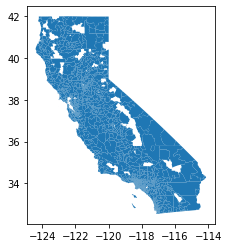

In [19]:
merged_gdf.plot()

In [20]:
merged_gdf.to_file(
    "data/ca_zips_demos_geo.geojson",
    driver="GeoJSON",
)